# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline


df = pd.read_csv('data/human_body_temperature.csv')

In [152]:
# Your work here.

In [153]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


# Q1: Is the distribution of body temperature normally distributed?

(array([ 4.,  6., 15., 26., 30., 30., 15.,  1.,  2.,  1.]),
 array([ 96.3 ,  96.75,  97.2 ,  97.65,  98.1 ,  98.55,  99.  ,  99.45,
         99.9 , 100.35, 100.8 ]),
 <a list of 10 Patch objects>)

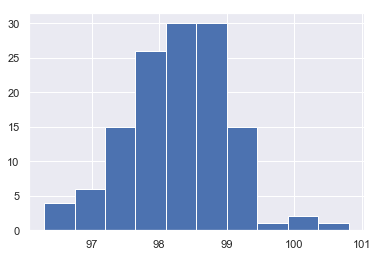

In [155]:
plt.hist(df['temperature'])

In [156]:
temp_mean = np.mean(df.temperature)
print('Sample mean: ' +str(np.round(temp_mean,2))+' Fahrenheit.')
temp_std = np.std(df.temperature)
print('Sample Standard Deviation ' +str(np.round(temp_std,2))+ ' Fahrenheit')


Sample mean: 98.25 Fahrenheit.
Sample Standard Deviation 0.73 Fahrenheit


/Users/matthewwong/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


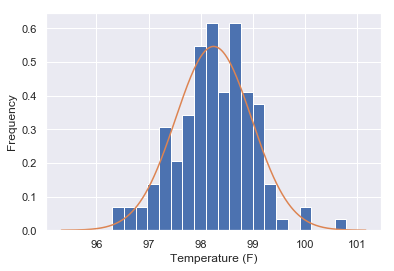

In [160]:
x = np.linspace(temp_mean-4*temp_std,temp_mean+4*temp_std,5000)
y = stats.norm.pdf(x,temp_mean, temp_std)
plt.hist(df.temperature, normed=True,bins=20)
plt.plot(x,y)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.show()

The plot of the temperatures looks to be normally distributed. However, comparing the histogram to the PDF suffers from binning bias, so it is better to compare the ECDF of the data to the theoretical CDF of the normal distribution. 

Probability Density Function (PDF)
    - Continuous analog to the PMF (probability mass function)
    - Mathematical description of the relative likelihood of observing a value of a continous variable. 
    - areas under the PDF gives probabilities
    - the CDF (cumulative distribution function), of the normal distribution gives the probability of x will be less than the value of x-axis 


Normal Distribution
    - describes a continuous variable whose PDF(probability density function) is symmetric and has a single symmetric peak
    - parameterized by mean (determines the peak) and standard deviation (how wide the peak is, how spread out the data are)
 

In [40]:
#function to create an ecdf for a dataset 
def ecdf(data):
    '''Takes in a data set and creates a ecdf for that set '''
    n= len(data)
    x= np.sort(data)
    y= np.arange(1,n+1)/n
    return x,y
    

To compute the theoretical CDF, we can use np.random.normal to draw samples and then we compute the CDF.

We need to provide parameters (mean and standard deviation), to parametrize the normal distribution we are sampling out of. The mean and standard deviations computed from the data (temperature) are good estimates.

In [31]:
mean = np.mean(df['temperature']) #parameter 1 of the normal distribution
std = np.std(df['temperature'])   #parameter 2 of the normal distribution
samples = np.random.normal(mean,std,size=10000) #compute samples
x_theor, y_theor = ecdf(samples)   #compute ecdf of thoertical samples
x,y =  ecdf(df['temperature'])     #compute ecdf of actual data

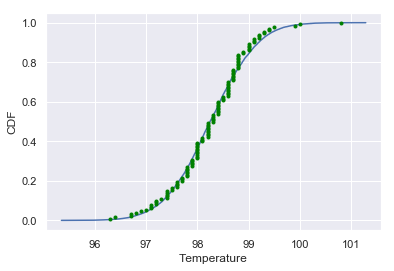

In [39]:
sns.set()
plt.plot(x_theor,y_theor)
plt.plot(x,y,marker='.',linestyle='none',color = 'green')
plt.xlabel('Temperature')
plt.ylabel('CDF')
plt.show()

#### With the absence of binning bias, we can say the Temperature data are approximately normally distributed. 

lets draw 100,000 samples using the mean and standard deviation of our data as the parameters. 

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


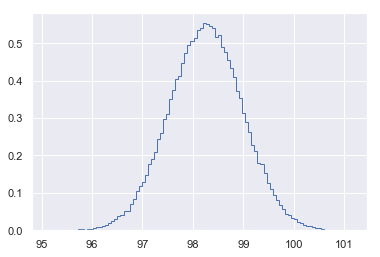

In [44]:
samples_temp = np.random.normal(mean,std,size=100000) 
plt.hist(samples_temp,bins=100,normed=True,histtype='step')
plt.show()

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


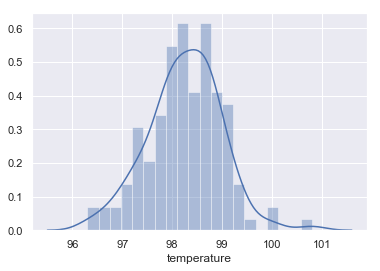

In [356]:
sns.distplot(df['temperature'],bins=20)

# Q2: Is the sample size large? Are the observations independent?

Central Limit Theorem
    - start with any distribution with a well-defined mean and variance (also means it has a well-defined standard deviation)
    - continuous or discrete
    - taking samples of the distribution parameter (mean) the mean distribution will eventually become normally distributed. 
    - as sample size becomes larger -> it becomes a perfect normal distribution

In [48]:
df['temperature'].count()

130

This sample is relatively large. For the central limit theorem a sample of n>30 is considered large. 

In [50]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [51]:
df.gender.value_counts()

F    65
M    65
Name: gender, dtype: int64

There are 130 observations, which is a relatively large size in sampling. We do not know how the data is gather but it is reasonable to assume they are independent observations. Measuring one person's temperature should not depend on another person's temperature. 130 is also below 10% of the human population so we can assume independence. 

# Q3: Is the true population mean really 98.6 degrees F?

We would choose to do a one sample test, since we are comparing one set of data to a single number.

### Null Hypothesis
We want to know if the true population mean is really 98.6. Therefore our Null Hypthesis would be:
#### Null Hypothesis : The mean of temperature is 98.6°F
#### Alternative Hypothesis : The mean of temperature is not 98.6°F

We then use a function (draw_bs_reps) to generate the bootstrap replicates, which is the value of the test statistic computed from a bootstrap sample. 

In [214]:
#Functions for generating boostrap sample and many bootstrap replicates
def bs_replicate_1d(data, func):
    '''Bootstraps the data and passes it to the desired function'''
    return func(np.random.choice(data,size=len(data)))

def draw_bs_reps(data, func,size=1):
    '''Draw bootstrap replicates.'''
    #initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    #generate replicates
    for i in range(size):
        bs_replicates[i] = bs_replicate_1d(data,func)
    return bs_replicates


In [217]:
test_mean = 98.6
temp_mean = np.mean(df.temperature)
print('The mean temp of the dataset:', temp_mean)
print('The test mean of the dataset:', test_mean)

def diff_from_mean(data, test_mean=98.6):
    ''' returns the difference between the data"s mean and some value'''
    return np.mean(data) - test_mean

diff_obs = diff_from_mean(df.temperature)
print('observed difference: ', diff_obs)

#shift the data
temp_shift = (df['temperature'] - temp_mean) + test_mean
bs_reps = draw_bs_reps(temp_shift, diff_from_mean, 100000)
p_value = np.sum(bs_reps <= diff_obs)/ len(bs_reps)
print('p = ', p)

The mean temp of the dataset: 98.24923076923078
The test mean of the dataset: 98.6
observed difference:  -0.35076923076921673
p =  0.0


In [226]:
bs_replicates = draw_bs_reps(df.temperature, np.mean,10000)
bs_mean = np.mean(bs_replicates)
print('The mean of the replicates: ', round(bs_mean,2))

conf_int_95 = np.percentile(bs_replicates, [2.5,97.5])
conf_int_99 = np.percentile(bs_replicates, [0.5,99.5])
print('The 95% CI: ', conf_int_95)
print('The 99% CI: ', conf_int_99)

The mean of the replicates:  98.25
The 95% CI:  [98.12307692 98.37538462]
The 99% CI:  [98.08845769 98.41923462]


**We reject the null hypothesis that the true mean body temperature is 98.6. The mean of the replicates is about 98.25, and the confidence interval does not contain 98.6.**
 
When performing the bootstrap hypothesis test, we tested took the percentage of the difference out of 10000 samples, that were equal or ower thant the difference between the test mean (98.6) and the original mean of the dataset. No samples were equal or larger than the observed difference, shown by our p-value of 0.



## Frequentist Hypothesis Test

This will be a one-sample test as we are testing a sample against a single value. 

### Z-test

**Null Hypothesis**: The true mean temperature of the human body is 98.6°F

**Alternative Hypothesis**: The true mean temperature of the human body is not 98.6°F


Since our dataset is independent, has a symmetrical distribution and the sample size is relatively large, we can use a z-statistic. 

To compute the z-statistic we use the formula,  $z = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{N-1}}}$, where $\bar{x}$ is the sample mean, s the sample standard deviation, $\mu$ the mean (under the null hypthesis) and N the sample size

In [251]:
z = (np.mean(df['temperature'] - 98.6) / (np.std(df['temperature']/np.sqrt(129))))
print('The z-statistic is: ', z)

The z-statistic is:  -5.454823292364208


To calculate a p-statistic from this, we will use the stat.norm.cdf function to calculate the percentage of area under the PDF. We are interested in the probability of getting below -5.45 and greater than 5.45, therefore we multiply the calculation by 2.

In [252]:
p = stats.norm.cdf(z) * 2 #two tails
print('The p-value is: ', p)

The p-value is:  4.902157014109823e-08


**The p-value is .00000004, an extremely small value. This means that it is highly unlikely the mean we calculated has occured by chance if the null hypotheis is true. We can confidently reject the null hypothesis.**

### T-test

In [253]:
p_t = stats.t.cdf(z,df=129) * 2
print('The p-value for t-test is: ', p_t)

The p-value for t-test is:  2.410632041559567e-07


**The p-value from the t-test is .00000002, also extremely small. We can reject thie null hypothesis as well.** 

The t-value larger than the z-value, indicating that the t-distribution is wider than the normal distribution.

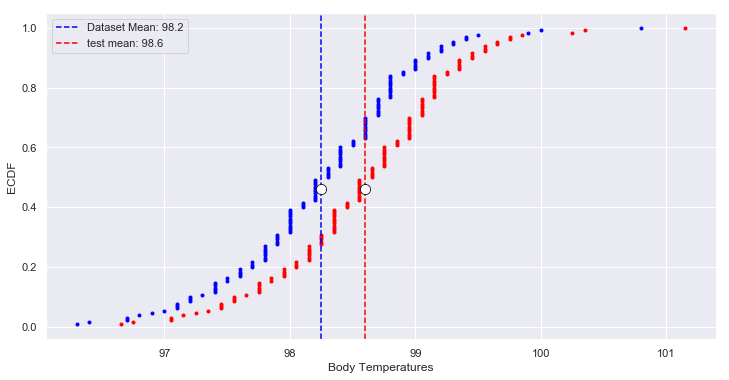

In [254]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

x_temp, y_temp = ecdf(df.temperature)
x_shift, y_shift = ecdf(temp_shift)

#generate plots
plt.plot(x_temp,y_temp, marker = '.', linestyle='none',color = 'blue')
plt.plot(x_shift,y_shift,marker= '.', linestyle='none', color = 'red')

#plot the means 
plt.axvline(x=np.mean(df.temperature),color = 'blue',linestyle='--',label = 'Dataset Mean: 98.2')
temp_shift_mean = np.mean(temp_shift)
plt.axvline(x=temp_shift_mean, color = 'red',linestyle='--',label='test mean: 98.6')
plt.plot(98.6,0.46,'ko',markersize=10.0,mfc='none')
plt.plot(np.mean(df.temperature),0.46,'ko',markersize=10.0,mfc='none')
plt.plot(98.6,0.46,'wo',markersize=8.0)
plt.plot(np.mean(df.temperature),0.46,'wo',markersize=8.0)


# Label the axes
_ = plt.xlabel('Body Temperatures')
_ = plt.ylabel('ECDF')

# Display the plot
plt.legend(loc='upper left')
plt.show()



# Q4: Draw a small sample of size 10 from the data and repeat both frequentist tests. 

In [274]:
np.random.seed(50)

Which one is the correct one to use?
    <li>since the samples are less than 30, we should use the t-statistic test. 



In [275]:
samples_10 = np.random.choice(df.temperature,10,replace=False)
samples_10

array([ 97.9,  98.6, 100.8,  98.2,  97.9,  98.2,  97.9,  98.3,  97.6,
        98.1])

In [281]:
samples_10_mean = np.mean(samples_10)
samples_10_std = np.std(samples_10)

sem = samples_10_std/np.sqrt(129)

test_stat_10 = (samples_10_mean - 98.6)/ sem

p_t_sample_10 = stats.t.cdf(t_score_10,df=9) * 2
p_z_sample_10 = stats.norm.cdf(z_score_10) * 2

print('The p-value for z-test is ', p_z_sample_10)
print('The p-value for t-test is: ', p_t_sample_10)


The p-value for z-test is  0.000914017064650932
The p-value for t-test is:  0.009001236353986539


In [279]:
p_t_sample_10 = stats.t.cdf(t_score_10,df=9) * 2
p_z_sample_10 = stats.norm.cdf(z_score_10) * 2

print('The p-value for z-test is ', p_z_sample_10)
print('The p-value for t-test is: ', p_t_sample_10)


The p-value for z-test is  0.000914017064650932
The p-value for t-test is:  0.009001236353986539


What do you notice? What does this tell you about the difference in application of the  t and  z  statistic?

<li> The p-value from the t-test is much larger than the p-value from the z-test. We can see it is approaching a value where it can become non-significant to reject the null hypothesis. The t-test is designed for small sample size where the more extreme values happen by random chance. This just reflects the lack of uncertainty given by our small sample size. 

# Q5: At what temperature should we consider someone's temperature to be "abnormal"?
   <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>

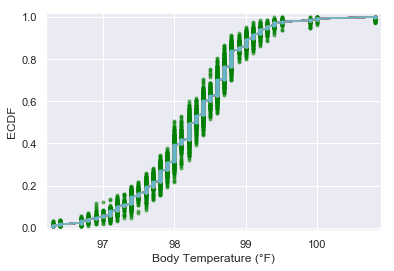

In [300]:
for _ in range(50):
    #generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(df.temperature.values, size= len(df.temperature.values))
    
    #compute and plot ECDF from bootstrap sample
    x,y = ecdf(bs_sample)
    plt.plot(x,y, marker = '.',linestyle='none',color = 'green',alpha=0.5)
    
    #compute and plot ECDF of original data
    
    x,y = ecdf(df.temperature)
    plt.plot(x,y,marker='.')
    
    plt.margins(0.02)
    plt.xlabel('Body Temperature (°F)')
    plt.ylabel('ECDF')

    
    

Lets compute the Confidence Interval of 99%. Anything outside of our confidence interval would be abnormal. 

#### Frequentist approach

The margin of error can be calculated in two ways:
<li> Margin of error = Critical value * Standard deviation
<li> Margin of error = Critical value * Standard error of the statistic
   

Since we already know the distribution of our temperatures is approximately normal, the margin of error for our confidence interval is (plus or minus) the standard deviation multiplied by the z-statistic. 

In [316]:
sample_mean = np.mean(df['temperature'])
sample_std = np.std(df['temperature'])

The critical value of a 99% Confidence Interval is 2.575 (derived from a z-table)

In [285]:
sample_mean - 2.575 * sample_std, sample_mean + 2.575 * sample_std

(96.3685594885503, 100.12990204991125)

In [294]:
conf_int = stats.norm.interval(0.99, loc = sample_mean, scale=sample_std)
print(conf_int)
print('Our Confidence Interval is: ['+ str(sample_mean - 2.575 * sample_std)+','+ str(sample_mean + 2.575 * sample_std)+']')
      
      


(96.3679538002523, 100.13050773820926)
Our Confidence Interval is: [96.3685594885503,100.12990204991125]


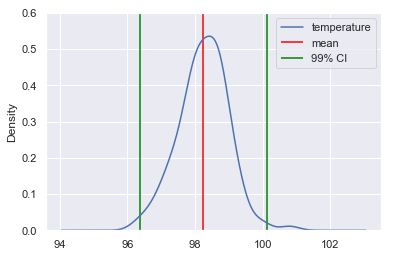

In [332]:

ax = df.temperature.plot.kde()
stderr = stats.sem(df.temperature)
ax.vlines(x=np.mean(df['temperature']),ymin= 0,ymax=.6,color='red',label='mean')
ax.vlines(x=sample_mean - 2.575 * sample_std,ymin=0,ymax=.6,color='green',label = '99% CI')
ax.vlines(x=sample_mean + 2.575 * sample_std,ymin=0,ymax=.6,color='green')
ax.set_ylim([0,.6])
ax.legend()
plt.show()

Based off this interval, an abnormal temperature would be one that is below 96.4 or above 100.1 degrees Fahrenheit.

#### Boostrap approach

In [306]:
bs_replicates_abn = draw_bs_reps(df['temperature'],np.mean,10000)
bs_mean_abn = np.mean(bs_replicates)

conf_int_99_abn = np.percentile(bs_replicates_abn, [0.5,99.5])
print('The 99% CI: ', conf_int_99_abn)

The 99% CI:  [98.08691923 98.41616154]


/Users/matthewwong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


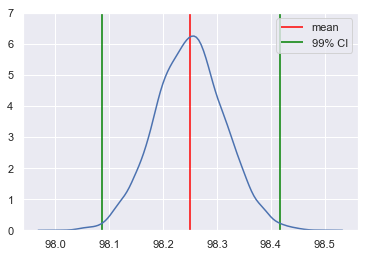

In [339]:

ax = sns.kdeplot(bs_replicates_abn)
stderr = stats.sem(bs_replicates_abn)
ax.vlines(x=np.mean(bs_replicates_abn),ymin= 0,ymax=7,color='red',label='mean')
ax.vlines(x=98.08691923,ymin=0,ymax=7,color='green',label = '99% CI')
ax.vlines(x=98.41616154,ymin=0,ymax=7,color='green')
ax.set_ylim([0,7])
ax.legend()
plt.show()

# Q6: Is there a significant difference between males and females in normal temperature?

In [346]:
df_male = df[df['gender'] == 'M']
df_female = df[df['gender']== 'F']

Our first step should always perform Exploratory Data Analysis

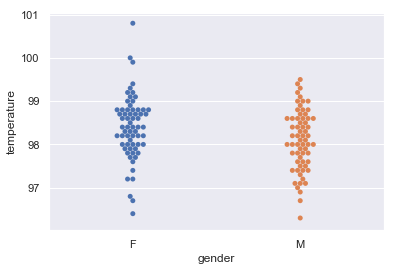

In [363]:
_ = sns.swarmplot('gender','temperature',data=df)
plt.show()

Females look to have 2 to 3slighly higher body temperature, it is too difficult to tell if they have difference, so we should proceed with the hypothesis test.

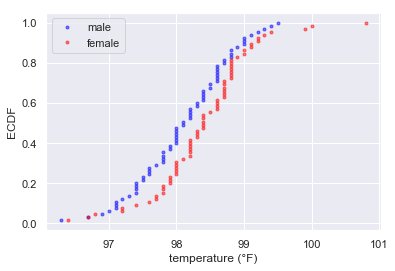

In [355]:
male_x ,male_y = ecdf(df_male['temperature'])
female_x, female_y = ecdf(df_female['temperature'])

_= plt.plot(male_x,male_y, marker='.',linestyle='none',color = 'blue',label='male',alpha=0.5)
_= plt.plot(female_x,female_y,marker='.',linestyle='none',color = 'red',label='female',alpha=0.5)
_= plt.xlabel('temperature (°F)')
_= plt.ylabel('ECDF')
_= plt.legend()
plt.show()


From their ECDF graphs male and females are indeed different. With females having slightly higher body temperatures than males. 

Both the temperatrues are pretty close but they are indeed different. We should do a hypothesis test to find if there is a differene or if the difference happened by random chance.

## Bootstrap Hypothesis Test

**Pipeline for hypothesis testing**
<li> Clearly state the null hypothesis
<li> Define your test statistic
<li> Generate many sets of simulated data assuming the null hypothesis is true
<li> Compute the test statistic for each simulated data set
<li> The p-value is the fraction of your simulated data sets for which the test statistic is at least as extreme as for the real data

**Null Hypothesis**: There is no difference between male and female temperatures.

**Alternative Hypothesis**: There is a difference between male and female temperatures

Since we want to test the difference between male and female temperatures, the difference between mean temperatures should be zero. Therefore our **test statistic will be the difference in means**. 

Permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test. 

In [361]:
#permutation sampling functions
def permutation_sample(data1,data2):
    '''generate a permutation sample from two data sets.'''
    
    #concatenate the data sets
    data = np.concatenate((data1,data2))
    
    #permute the concatentated array
    permuted_data = np.random.permutation(data)
    
    #split the permuted array into two
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2



def draw_perm_reps(data_1, data_2, func, size=1):
    ''' generate multiple permutation replicates'''
    #initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)
    
    for i in range(size):
        #generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)
        
        #compute the test statistic 
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)
        
    return perm_replicates

In [374]:
temp_mean_m =np.mean(df_male['temperature'])
temp_mean_f = np.mean(df_female['temperature'])
all_mean = np.mean(df['temperature'])
print('The mean temperature for males: ', temp_mean_m)
print('The mean temperature for females: ', temp_mean_f)
print('The mean temperature for all: ', all_mean)

diff_g_mean = np.mean(df_male['temperature']) - np.mean(df_female['temperature'])
print('The difference in gender mean is: ', diff_g_mean)




The mean temperature for males:  98.1046153846154
The mean temperature for females:  98.39384615384613
The mean temperature for all:  98.24923076923078
The difference in gender mean is:  -0.289230769230727


In [375]:
male_temp_shifted = (df_male['temperature'] - temp_mean_m) + all_mean
female_temp_shifted = (df_female['temperature']-temp_mean_f) + all_mean

It is possible the temperatures of both genders are the same and the observations we got was by chance. What is the probability of getting at least a -0.289 difference in mean temperatures under the hypothesis that the distributions of temperatures of the two genders are identical. 

In [376]:
bs_replicates_male = draw_bs_reps(male_temp_shifted, np.mean, 10000)
bs_replicates_female = draw_bs_reps(female_temp_shifted,np.mean,10000)

In [378]:
bs_replicates_diff = bs_replicates_male - bs_replicates_female
empirical_diff_mean = np.mean(temp_mean_m) - np.mean(temp_mean_f)
print(empirical_diff_mean)

-0.289230769230727


From our data we have a difference mean of -0.289 between the sample means of the genders. From our exploratory data analysis we know females have a slightly higher temperature than males. (Alternative Hypothesis) 

Meaning we should calculate the bootstrap probability of getting a value for the female mean at least 2.89 higher than male mean. But we are only testing if males and female temperatures are different. 

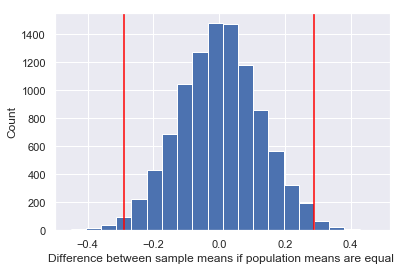

In [380]:
_ = plt.hist(bs_replicates_diff,bins=20)
_ = plt.xlabel('Difference between sample means if population means are equal ')
_ = plt.ylabel('Count')
_ = plt.axvline(x=empirical_diff_mean,color = 'red')
_ = plt.axvline(x=-empirical_diff_mean, color = 'red')

In [402]:
p =  np.sum(np.abs(bs_replicates_diff) >= np.abs(empirical_diff_mean)) /len(bs_replicates_diff)

print('The p-value is ', p)


The p-value is  0.0209


## Frequentist Hypothesis Test

For our frequentist hypothesis test, we will use the same null hypothesis as our bootstrap test.

**Null Hypothesis: There is no difference in mean temperature between male and female.**

In [412]:
# check sample size to assume normality

df_male_temp = df_male.temperature
df_female_temp = df_female.temperature

print('sample size for our sampling distribution of male body temperature '+ str(len(df_male_temp))+'.')
print('sample size for our sampling distribution of female body temperature '+ str(len(df_female_temp))+'.')

#both are large enough to apply the central limit theore.


sample size for our sampling distribution of male body temperature 65.
sample size for our sampling distribution of female body temperature 65.


In [419]:
#calculate the mean and standard deviation for each sampling distribution
male_temp_mean = np.mean(df_male_temp)
female_temp_mean = np.mean(df_female_temp)
male_temp_std = np.std(df_male_temp)
female_temp_std = np.std(df_female_temp)
diff_mean = female_temp_mean - male_temp_mean
diff_std = np.sqrt((male_temp_std**2/len(df_male_temp))+(female_temp_std**2/len(df_female_temp)))

print('The difference of the distributions has a mean of: ', round(diff_mean,4))
print('The difference of the distributions has a standard deviation of: ', round(diff_std,4))


The difference of the distributions has a mean of:  0.2892
The difference of the distributions has a standard deviation of:  0.1256


We can now calculate the likelihood of getting a value as extreme as our difference of means.

In [422]:
p_diff_value = (1-stats.norm.cdf(diff_mean,scale=diff_std))*2
print('The p-value is: ', p_diff_value)

The p-value is:  0.021266451830129318


If we had a significance level of 0.5 (the standard for statistical testing) we can reject the null hypothesis that the mean temperature is the same between men and women. Indicating that it is statistically significant.  

In [425]:
#alternative way of testing using scipy
import scipy.stats as sstats
sstats.ttest_ind(df_male_temp,df_female_temp)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

# Conclusions

The mean normal body temperature was held to be 37 ∘ C or 98.6 ∘ F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

We can not say for certain and absolute fact if the actual mean of normal body temperature is in fact 98.6 ° F. However, we can say based on the sample we analyzed, the mean of body temperature is not 98.6 ° F. The mean of body temperature is closer to 98.25 °F. 

Based off our boostrap 95% confidence interval of the temperature data the true mean of temperature is between 98.123 and  98.375 degrees Fahrenheit.

Additionally, Male and female body temperatures are statistically different at a 5% significance level. With females having a slightly higher body temperature.
